# Validation using DIGEST

Notebook to recreate the results presented in the paper. Keep in mind, that the results can slighty differentiate as the random background will not create the exact same random sets as before. 

## Setup

In [4]:
import os
import sys
import json
import pandas as pd
from IPython.display import IFrame
# ==== import DIGEST python package called biodigest ==== 
from biodigest.single_validation import single_validation, save_results
from biodigest.evaluation.d_utils.plotting_utils import create_plots

import warnings
warnings.filterwarnings("ignore")

If it is the first time that this package is used after installation, make sure that setup has been run before to have all required files.

In [3]:
from biodigest import setup
setup.main(setup_type="api")

[00:02:42|365.80MB] Starting Setup ...
[00:02:42|365.80MB] Get id and attribute mappings ...
[00:02:48|365.80MB] Get distance mappings ...
[00:02:48|365.80MB] Get distance mappings for jaccard ...
[00:03:10|372.23MB] Get distance mappings for overlap ...
[00:03:25|372.23MB] Finished Setup ...


## Cluster itself

Compare a target cluster of diseases or genes based on dunn index, sillhouette score or david bouldin index, while the random runs are simply cluster size preserving perturbation of cluster assignments.

## Gene Cluster

### Set input parameters

#### Required input

In [5]:
# ==== define required input ====
tar_cluster = pd.read_csv("input/target_gene_cluster.txt", header=None, sep="\t", dtype=str, names=["id", "cluster", "desc"])
tar_id_type = "symbol"
mode = "cluster"

#### Optional input (Default parameters are set)

In [6]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="complete" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model

# ==== define optional input influencing saving of results ====
out_dir = "results/gene_cluster/" 
verbose=True # printing additional information during the run
prefix="cluster_gene_symbol_complete"

### Run script

In [7]:
results = single_validation(tar=tar_cluster, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose, distance=distance_measure)

[00:00:00|372.23MB] Check for proper setup ...
[00:00:00|372.23MB] Starting validation ...
[00:00:00|372.23MB] Load mappings for input into cache ...
[00:00:02|681.54MB] Load distances for input into cache ...
[00:00:11|2468.41MB] Load input data ...
[00:00:11|2469.22MB] Validation of input ...
Missing values for pathway.kegg :9/20
[00:00:11|2470.04MB] Validation of random runs ...
[00:06:31|2471.40MB] Finished validation


### Inspect results

Check all P-values

In [8]:
pd.DataFrame(results["p_values"]['values'])

,di,ss,dbi
go.BP,0.065934,0.373626,0.140859
go.CC,0.378621,1.000000,0.812188
go.MF,0.403596,1.000000,0.770230
pathway.kegg,0.350649,1.000000,0.715285


Check validation values of input cluster

In [9]:
pd.DataFrame(results["input_values"]['values'])

,di,ss,dbi
go.BP,0.097523,-0.700000,0.180988
go.CC,0.181698,-1.000000,1.835614
go.MF,0.184877,-0.900000,1.962328
pathway.kegg,0.279293,-0.909091,0.275175


### Save results

#### Save full results as json and upper two tables as csv

In [10]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

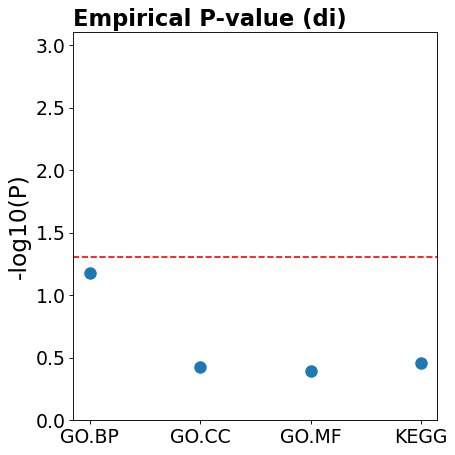

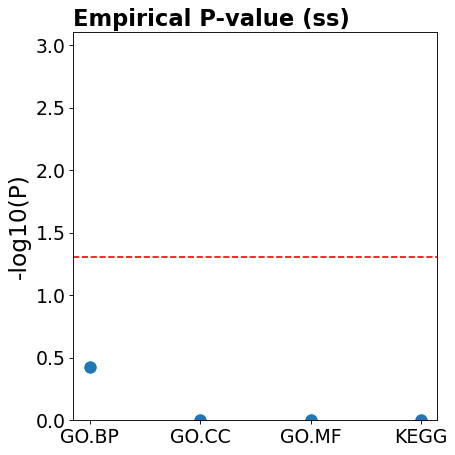

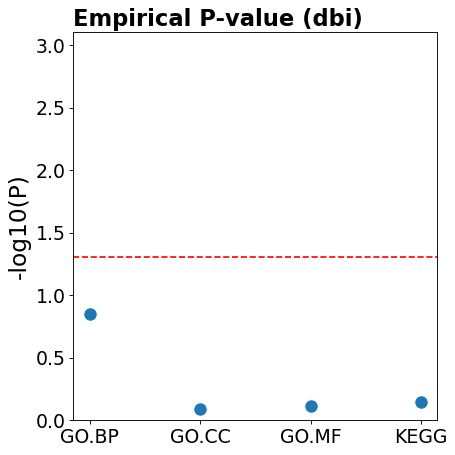

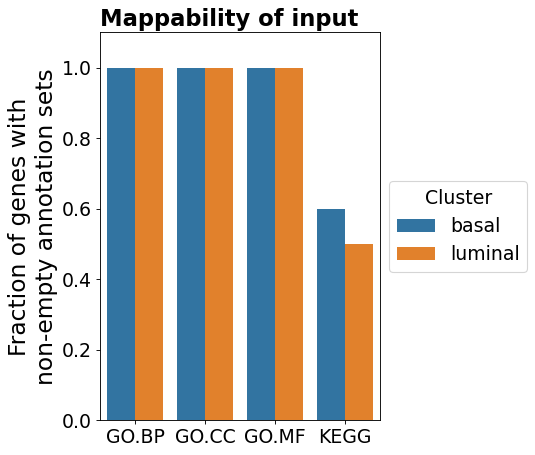

In [11]:
create_plots(results=results, mode=mode, tar=tar_cluster, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Keep in mind, that after plotting, the resulting plots are also saved in the output directory.

## Disease Cluster

### Set input parameters

#### Required input

In [10]:
# ==== define required input ====
tar_cluster = pd.read_csv("input/target_disease_cluster.txt", header=None, sep="\t", dtype=str, names=["id", "cluster", "desc"])
tar_id_type = "ICD-10"
mode = "cluster"

#### Optional input (Default parameters are set)

In [11]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="complete" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model

# ==== define optional input influencing saving of results ====
out_dir = "results/disease_cluster/" 
verbose=True # printing additional information during the run
prefix="cluster_disease_ICD-10_complete"

### Run script

In [12]:
results = single_validation(tar=tar_cluster, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose, distance=distance_measure)

[00:00:00|2415.21MB] Starting validation ...
[00:00:00|2415.21MB] Load mappings for input into cache ...
[00:00:02|2422.84MB] Load distances for input into cache ...
[00:00:03|2639.88MB] Load input data ...
[00:00:04|2639.96MB] Validation of input ...
Missing values for disgenet.genes_related_to_disease :2/64
Missing values for disgenet.variants_related_to_disease :7/64
Missing values for ctd.pathway_related_to_disease :18/64
[00:00:04|2642.46MB] Validation of random runs ...
[00:14:51|2643.46MB] Finished validation


### Inspect results

Check all P-values

In [13]:
pd.DataFrame(results["p_values"]['values'])

,di,ss,dbi
disgenet.genes_related_to_disease,0.078921,0.306693,0.357642
disgenet.variants_related_to_disease,0.122877,0.057942,0.878122
ctd.pathway_related_to_disease,0.079920,0.228771,0.011988


Check validation values of input cluster

In [14]:
pd.DataFrame(results["input_values"]['values'])

,di,ss,ss_inter,dbi
disgenet.genes_related_to_disease,0.000598,-0.984640,"{6: -0.9128836500828367, 4: -0.975536229900614...",269.503692
disgenet.variants_related_to_disease,0.000041,-0.647423,"{6: -0.9168409072815343, 4: -0.704172303966912...",1787.971398
ctd.pathway_related_to_disease,0.002213,-0.879166,"{4: -1.0, 2: -1.0, 3: -1.0, 5: -1.0, 7: -0.333...",49.648030


### Save results

#### Save full results as json and upper two tables as csv

In [15]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

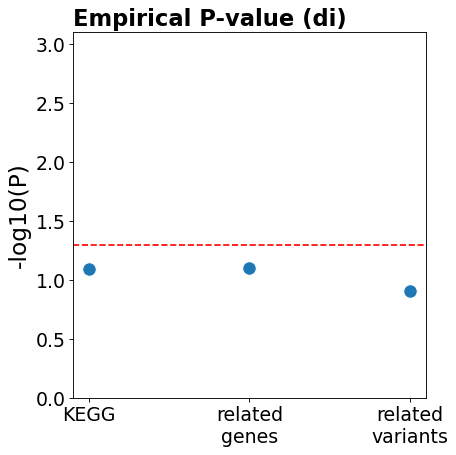

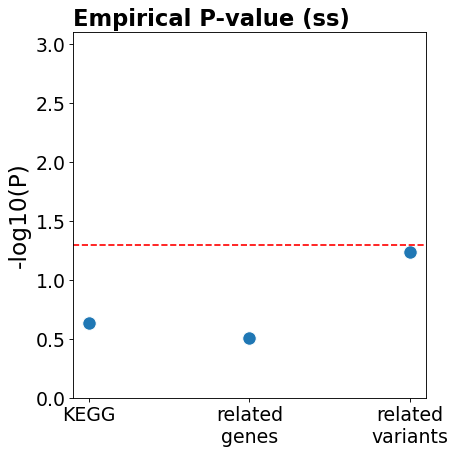

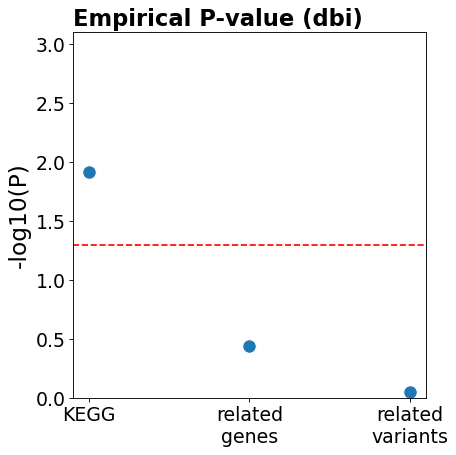

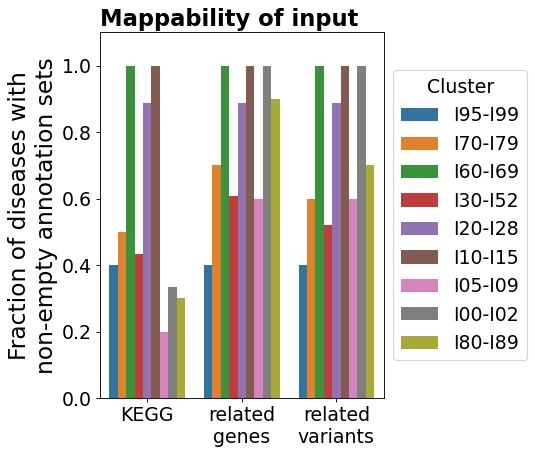

In [16]:
create_plots(results=results, mode=mode, tar=tar_cluster, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Keep in mind, that after plotting, the resulting plots are also saved in the output directory.

## Set itself

Validate a set by reference, either reference set or id, or reference-free. Two background models can be used. 

## Disease Set

### Set input parameters

#### Required input

In [17]:
# ==== define required input ====
tar_set = pd.read_csv("input/target_disease_set.txt", header=None, sep="\t", dtype=str)[0]
tar_id_type = "mesh"
mode = "set"

#### Optional input (Default parameters are set)

In [18]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="term-pres" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model

# ==== define optional input influencing saving of results ====
out_dir = "results/disease_set/" 
verbose=True # printing additional information during the run
prefix="set_disease_mesh_term-pres"

### Run script

In [21]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose, distance=distance_measure)

[00:00:00|2643.39MB] Starting validation ...
[00:00:00|2643.39MB] Load mappings for input into cache ...
[00:00:01|2681.21MB] Load distances for input into cache ...
[00:00:03|2681.73MB] Validation of input ...
[00:00:03|2681.73MB] Validation of random runs ...
[00:01:59|2682.61MB] Calculating p-values ...
[00:01:59|2682.61MB] Finished validation


### Inspect results

Check all P-values

In [22]:
pd.DataFrame(results["p_values"]['values'])

,set_value
ctd.pathway_related_to_disease,0.025974
disgenet.genes_related_to_disease,0.031968
disgenet.variants_related_to_disease,0.010989


Check validation values of input cluster

In [23]:
pd.DataFrame(results["input_values"]['values'])

,set_value
ctd.pathway_related_to_disease,3.926356
disgenet.genes_related_to_disease,1.694796
disgenet.variants_related_to_disease,0.275038


### Save results

#### Save full results as json and upper two tables as csv

In [24]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

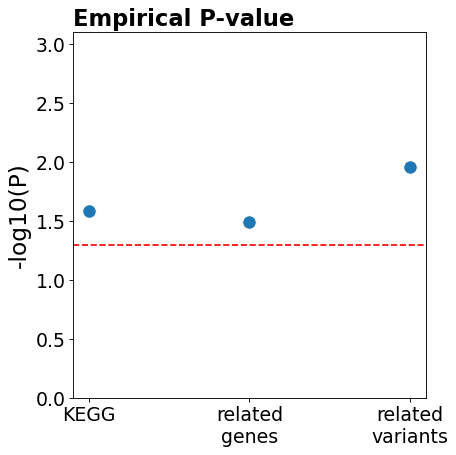

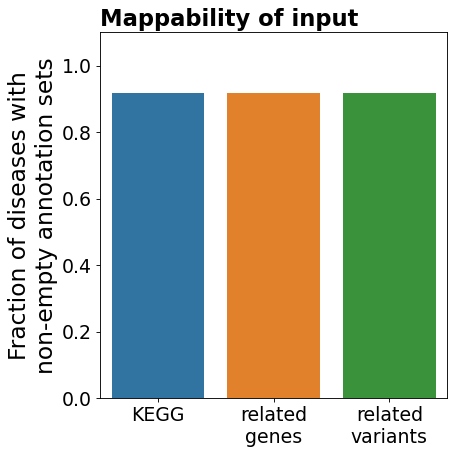

In [25]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

## Gene Set

### Set input parameters

#### Required input

In [26]:
# ==== define required input ====
tar_set = pd.read_csv("input/target_gene_set.txt", header=None, sep="\t", dtype=str)[0]
tar_id_type = "symbol"
ref_set = pd.read_csv("input/reference_gene_set.txt", header=None, sep="\t", dtype=str)[0]
ref_id_type = "symbol"
mode = "set-set"

#### Optional input (Default parameters are set)

In [29]:
# ==== define optional input influencing results ====
distance_measure="jaccard" # which distance measure should be chosen. Choice between jaccard and overlap
background_model="term-pres" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model
enriched=True

# ==== define optional input influencing saving of results ====
out_dir = "results/gene_set/" 
verbose=True # printing additional information during the run
prefix="set-set_gene_symbol_term-pres"

### Run script

In [30]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, ref=ref_set, ref_id=ref_id_type, mode=mode, 
                            runs=runs, background_model=background_model, verbose=verbose, enriched=enriched, 
                            distance=distance_measure)

[00:00:00|2682.61MB] Starting validation ...
[00:00:00|2682.61MB] Load mappings for input into cache ...
[00:00:18|2731.17MB] Validation of input ...
[00:00:18|2731.17MB] Validation of random runs ...
[00:02:36|2732.32MB] Calculating p-values ...
[00:02:36|2732.32MB] Finished validation


### Inspect results

Check all P-values

In [31]:
pd.DataFrame(results["p_values"]['values'])

,set_value
go.BP,0.000999
go.CC,0.000999
go.MF,0.010989
pathway.kegg,1.000000


Check validation values of input cluster

In [32]:
pd.DataFrame(results["input_values"]['values'])

,set_value
go.BP,0.625
go.CC,0.65
go.MF,0.35
pathway.kegg,0.0


### Save results

#### Save full results as json and upper two tables as csv

In [33]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

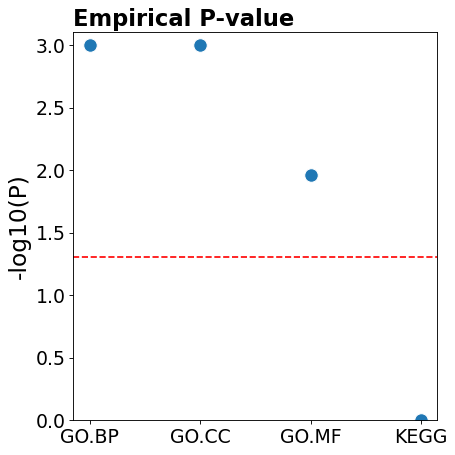

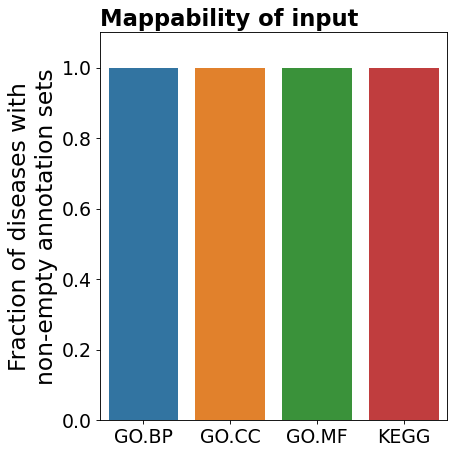

In [34]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)